In [ ]:
# Gabriel Medeiros do Nascimento
# Big Data Turma Q

In [1]:
# Installs

install.packages("e1071")
install.packages("party")

library(e1071)
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [15]:

mush = read.csv("https://www.openml.org/data/get_csv/24/dataset_24_mushroom.arff",
			header=T,
			stringsAsFactors=TRUE)



[1] <NA>
Levels: 'e' 'p'

In [ ]:
# Exploração para questão 10 
mush[, c('odor', 'class')]

In [4]:
RNGversion("3.5.2")
set.seed(1987)

# Elimina valores NA
mush[mush[]=="?"]=NA
mush=na.omit(mush)

# Gera Conjuntos de Treinamento e Teste
L <- sample(1:nrow(mush),round(nrow(mush)/3))
train <- mush[-L,]
test <- mush[L,]

Warning message in RNGkind("Mersenne-Twister", "Inversion", "Rounding"):
“non-uniform 'Rounding' sampler used”


In [5]:
fitBayes = naiveBayes(class~.,data=train,laplace=1)

# predict Output 
predBayes = predict(fitBayes, test)
predBayes

# matriz de confus�o
c_matrix = table(predBayes,test$class)
print(c_matrix)

cat('Accuracy Bayes: ', sum(diag(c_matrix))/sum(c_matrix)*100, ' %', "\n")

[1] 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
  [19] 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
  [37] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e'
  [55] 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e'
  [73] 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'p'
  [91] 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e'
 [109] 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e'
 [127] 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'e'
 [145] 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
 [163] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p'
 [181] 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 [199] 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p'
 [217] 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e'
 [235] 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'p'
 [253] 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e'
 [271] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e'
 [289] 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p'
 [307] 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
 [325] 'p' 'p' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e'
 [343] 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'p'
 [361] 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e'
 [379] 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e'
 [397] 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e'
 [415] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p'
 [433] 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
 [451] 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p'
 [469] 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e'
 [487] 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'p' 'e' 'p' 'e'
 [505] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e'
 [523] 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p'
 [541] 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 [559] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'e'
 [577] 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e'
 [595] 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'p'
 [613] 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'p'
 [631] 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p'
 [649] 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'p'
 [667] 'e' 'p' 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p'
 [685] 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e'
 [703] 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e'
 [721] 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p'
 [739] 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
 [757] 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p'
 [775] 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'p'
 [793] 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e'
 [811] 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p'
 [829] 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e'
 [847] 'p' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e'
 [865] 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e'
 [883] 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e'
 [901] 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e

         
predBayes  'e'  'p'
      'e' 1146   22
      'p'    9  704
Accuracy Bayes:  98.35194  % 


In [10]:
summary(predBayes)

'e'  'p' 
1168  713

Warning message in factor_trafo(x):
“factors at only one level may lead to problems”
Warning message in factor_trafo(x):
“factors at only one level may lead to problems”


[1] 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
  [19] 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
  [37] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e'
  [55] 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e'
  [73] 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'p'
  [91] 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
 [109] 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'p'
 [127] 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'e' 'e'
 [145] 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'p'
 [163] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p'
 [181] 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 [199] 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p'
 [217] 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e'
 [235] 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'p'
 [253] 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e'
 [271] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e'
 [289] 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p'
 [307] 'e' 'e' 'p' 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
 [325] 'p' 'p' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e'
 [343] 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'p'
 [361] 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'p' 'p' 'e'
 [379] 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e'
 [397] 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e'
 [415] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p'
 [433] 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e'
 [451] 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'p'
 [469] 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'e'
 [487] 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p' 'e' 'p' 'p' 'e' 'p' 'e' 'p' 'e'
 [505] 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e'
 [523] 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p'
 [541] 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e'
 [559] 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'e' 'e'
 [577] 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e'
 [595] 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'p'
 [613] 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'p'
 [631] 'p' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p'
 [649] 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'p'
 [667] 'e' 'p' 'e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p'
 [685] 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e'
 [703] 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'p' 'e' 'e' 'e'
 [721] 'e' 'p' 'e' 'e' 'p' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p'
 [739] 'p' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'e'
 [757] 'p' 'p' 'e' 'p' 'p' 'e' 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'e' 'p' 'e' 'p'
 [775] 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'p' 'e' 'p' 'e' 'e' 'p' 'e' 'p'
 [793] 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e'
 [811] 'e' 'p' 'p' 'p' 'e' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p'
 [829] 'e' 'e' 'p' 'p' 'p' 'p' 'e' 'p' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'e'
 [847] 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'p' 'e' 'e' 'p' 'p' 'e' 'e' 'e' 'e'
 [865] 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'e' 'p' 'p' 'p' 'e'
 [883] 'p' 'p' 'p' 'e' 'e' 'e' 'e' 'e' 'p' 'p' 'p' 'p' 'p' 'p' 'e' 'e' 'e' 'e'
 [901] 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e' 'p' 'e' 'e' 'e

        
predTree  'e'  'p'
     'e' 1155    0
     'p'    0  726
Accuracy Dtree:  100  % 


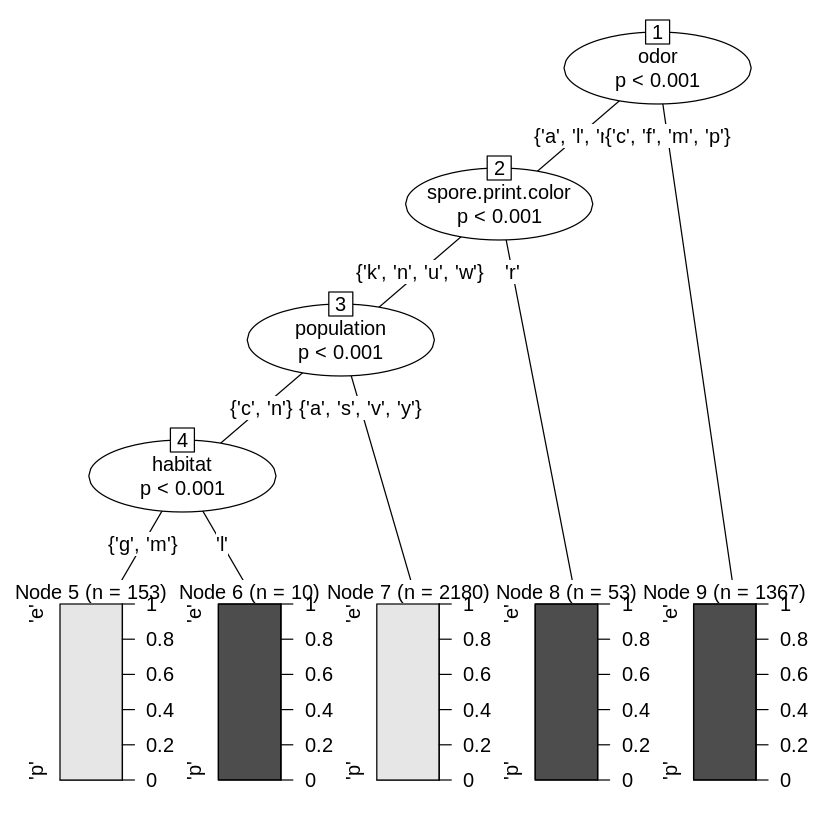

In [6]:
fitTree = ctree(class~.,data=train)

# predict Output 
predTree = predict(fitTree, test)
predTree

# matriz de confus�o
c_matrix = table(predTree,test$class)
print(c_matrix)

cat('Accuracy Dtree: ', sum(diag(c_matrix))/sum(c_matrix)*100, ' %', "\n")

plot(fitTree)

In [14]:
fitTree


	 Conditional inference tree with 5 terminal nodes

Response:  class 
Inputs:  cap.shape, cap.surface, cap.color, bruises.3F, odor, gill.attachment, gill.spacing, gill.size, gill.color, stalk.shape, stalk.root, stalk.surface.above.ring, stalk.surface.below.ring, stalk.color.above.ring, stalk.color.below.ring, veil.type, veil.color, ring.number, ring.type, spore.print.color, population, habitat 
Number of observations:  3763 

1) odor == {'a', 'l', 'n'}; criterion = 1, statistic = 3503.542
  2) spore.print.color == {'k', 'n', 'u', 'w'}; criterion = 1, statistic = 2058.801
    3) population == {'c', 'n'}; criterion = 1, statistic = 2342
      4) habitat == {'g', 'm'}; criterion = 1, statistic = 162
        5)*  weights = 153 
      4) habitat == {'l'}
        6)*  weights = 10 
    3) population == {'a', 's', 'v', 'y'}
      7)*  weights = 2180 
  2) spore.print.color == {'r'}
    8)*  weights = 53 
1) odor == {'c', 'f', 'm', 'p'}
  9)*  weights = 1367 

In [ ]:
summary(mush)

 cap.shape  cap.surface   cap.color    bruises.3F      odor     
 'b': 300   'f':2160    'g'    :1696   'f':2460   'n'    :2776  
 'c':   4   'g':   4    'n'    :1164   't':3184   'f'    :1584  
 'f':2432   's':1260    'y'    :1056              'a'    : 400  
 'k':  36   'y':2220    'w'    : 880              'l'    : 400  
 's':  32               'e'    : 588              'p'    : 256  
 'x':2840               'b'    : 120              'c'    : 192  
                        (Other): 140              (Other):  36  
 gill.attachment gill.spacing gill.size    gill.color   stalk.shape stalk.root
 'a':  18        'c':4620     'b':4940   'p'    :1384   'e':2764    ?  :   0  
 'f':5626        'w':1024     'n': 704   'n'    : 984   't':2880    'b':3776  
                                         'w'    : 966               'c': 556  
                                         'h'    : 720               'e':1120  
                                         'g'    : 656               'r': 192  
      

In [ ]:
# Naive Bayes 
#
fitBayes = naiveBayes(class~.,data=train,laplace=1)

# predict Output 
predBayes = predict(fitBayes, test)
predBayes

# matriz de confus�o
c_matrix = table(predBayes,test$class)
print(c_matrix)

cat('Accuracy Bayes: ', sum(diag(c_matrix))/sum(c_matrix)*100, ' %', "\n")